# Priors for Bayesian analysis

Astromodels supports the definition of priors for all parameters in your model. You can use as prior any function (although of course not all functions should be used this way, but the choice is up to you).

First let's define a simple model containing one point source (see the "Model tutorial" for more info):

In [1]:
from astromodels import *

# Create a point source named "pts1"
pts1 = PointSource('pts1',ra=125.23, dec=17.98, spectral_shape=powerlaw())

# Create the model
my_model = Model(pts1)

Now let's assign uniform priors to the parameters of the powerlaw function. The function uniform_prior is defined like this:

In [2]:
uniform_prior.info()

We can use it as such:

In [3]:
# Set 'lower_bound' to -10, 'upper bound' to 10, and leave the 'value' parameter 
# to the default value
pts1.spectrum.main.powerlaw.logK.prior = uniform_prior(lower_bound = -10, upper_bound=10)

# Display it
pts1.spectrum.main.powerlaw.logK.display()

# Set 'lower_bound' to -10, 'upper bound' to 0, and leave the 'value' parameter 
# to the default value
pts1.spectrum.main.powerlaw.index.prior = uniform_prior(lower_bound = -10, upper_bound=0)

pts1.spectrum.main.powerlaw.index.display()

Parameter logK = 0.0
(min_value = -40, max_value = 40, delta = 0.1, free = True) [prior: uniform_prior]

Parameter index = -2.0
(min_value = -10, max_value = 10, delta = 0.2, free = True) [prior: uniform_prior]

Now we can evaluate the prior simply as:

In [4]:
# Evaluate the prior in 5.2
prior_value = pts1.spectrum.main.powerlaw.logK.prior(5.2)

print("The prior for logK evaluate to %s in 5.2" % prior_value)

The prior for logK evaluate to 1.0 in 5.2


Let's plot the value of the prior at some random locations:

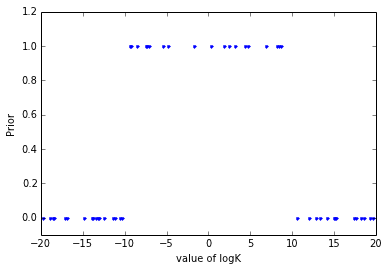

In [7]:
# You need matplotlib installed for this
import matplotlib.pyplot as plt

# This is for the IPython notebook
%matplotlib inline

# Let's get 500 points uniformly distributed between -20 and 20

random_points = np.random.uniform(-20,20,50)

plt.plot(random_points,pts1.spectrum.main.powerlaw.logK.prior(random_points), '.' )

plt.ylim([-0.1,1.2])
plt.xlabel("value of logK")
plt.ylabel("Prior")